In [348]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

np.random.seed(0xdeadbeef)


In [349]:
def make_sample(nexamples):
    normal = np.random.multivariate_normal
    # squared width:
    s2 = 1
    # below, we provide the coordinates of the mean as 
    # a first argument, and then the covariance matrix
    # we generate nexamples examples for each category
    sgx0 = normal([0.,0.], [[s2, 0.], [0.,s2]], nexamples)
    sgx1 = normal([1.,1.], [[s2, 0.], [0.,s2]], nexamples)
    # setting the labels for each category
    sgy0 = np.zeros((nexamples,))
    sgy1 = np.ones((nexamples,))
    sgx = np.concatenate([sgx0,sgx1])
    sgy = np.concatenate([sgy0,sgy1])
    return sgx, sgy

In [350]:
sgx, sgy = make_sample(20)
tgx, tgy = make_sample(200)

Text(0,0.5,'x2')

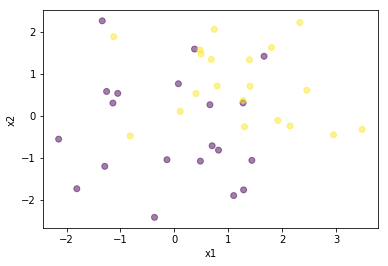

In [351]:
plt.scatter(sgx[:,0], sgx[:,1], alpha=0.5, c=sgy)
plt.xlabel('x1')
plt.ylabel('x2')

In [352]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50,50,50), activation='relu', max_iter=10000, random_state=1)
mlp.fit(sgx,sgy)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [353]:
def plot_result(sample, targets):
    xmin, xmax, npoints = (-5,5,101)
    gridx1, gridx2 = np.meshgrid(np.linspace(xmin,xmax,npoints), np.linspace(xmin,xmax,npoints))
    grid = np.c_[gridx1.flatten(), gridx2.flatten()]
    probs = mlp.predict_proba(grid)
    plt.pcolor(gridx1, gridx2, probs[:,1].reshape(npoints,npoints), cmap='binary')
    plt.colorbar()
    plt.scatter(sample[:,0], sample[:,1], c=targets, cmap='plasma', alpha=0.5, marker='.')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

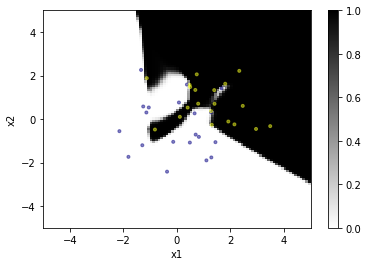

In [354]:
plot_result(sgx,sgy)

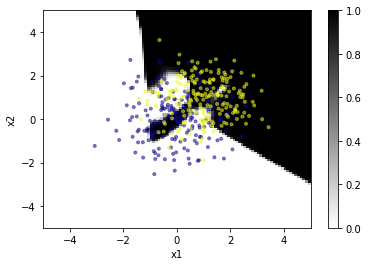

In [355]:
plot_result(tgx,tgy)

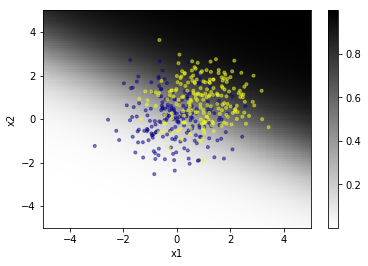

In [356]:
mlp = MLPClassifier(hidden_layer_sizes=(), activation='relu', max_iter=10000, random_state=1)
mlp.fit(sgx,sgy)
plot_result(tgx,tgy)

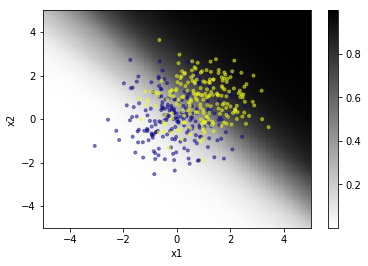

In [357]:
sgx, sgy = make_sample(10000)
mlp = MLPClassifier(hidden_layer_sizes=(50,50,50), activation='relu', max_iter=10000, random_state=1)
mlp.fit(sgx,sgy)
plot_result(tgx, tgy)